<a href="https://colab.research.google.com/github/SushilKokare/University_Project/blob/Keras_Applications/KA_38_ConvNeXtXLarge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras import backend as k
from keras.applications import ConvNeXtXLarge
from matplotlib import pyplot as plt

In [4]:

def show_result(history):
  plt.figure(figsize=(5,3))
  plt.title("Loss Training Vs Validation")
  plt.plot(history.history['loss'],color='blue',label='Train Loss')
  plt.plot(history.history['val_loss'],color='orange',label='Val Loss')
  plt.legend()
  plt.show()

  plt.figure(figsize=(5,3))
  plt.title("Accuracy Training Vs Validation")
  plt.plot(history.history['accuracy'],color='blue',label='Train Acc')
  plt.plot(history.history['val_accuracy'],color='orange',label='Val Acc')
  plt.legend()
  plt.show()
     

In [5]:
def prepro_data(pathTrain,pathTest,img_size,batch_size):
  
  if k.image_data_format() == 'channels_first':
    input_shape = (3,img_size[0],img_size[1])
  else:
    input_shape = (img_size[0],img_size[1],3)

  train_gen = ImageDataGenerator(rescale = 1./255)
  test_gen = ImageDataGenerator(rescale = 1./255)

  train_data = train_gen.flow_from_directory(
      pathTrain,
      target_size = img_size,
      # batch_size = batch_size,
      class_mode = 'binary'
  ) 

  test_data = test_gen.flow_from_directory(
      pathTest,
      target_size = img_size,
      # batch_size = batch_size,
      class_mode = 'binary'
  )

  print(" Train Data Image Shape = {}".format(train_data.image_shape))
  print(" Test Data Image Shape = {}".format(test_data.image_shape))
  print("Input Shape = {} ".format(input_shape))

  return train_data , test_data , input_shape

In [6]:
pathTrain = '/content/drive/MyDrive/AtiNeu Project/Data/MRI/Brain_Data_Organised/Train'
pathTest = '/content/drive/MyDrive/AtiNeu Project/Data/MRI/Brain_Data_Organised/Test'
     

In [7]:
train_data , test_data, input_shape = prepro_data(pathTrain,pathTest,(225,225),32)


Found 2251 images belonging to 2 classes.
Found 250 images belonging to 2 classes.
 Train Data Image Shape = (225, 225, 3)
 Test Data Image Shape = (225, 225, 3)
Input Shape = (225, 225, 3) 


In [9]:
base_model = ConvNeXtXLarge(weights = 'imagenet',include_top = False,
                      input_shape = input_shape)

1393257616/1393257616 [==============================] - 59s 0us/step


In [10]:
for layer in base_model.layers:
  layer.trainable = False


model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy'])

Epoch 1/10
71/71 [==============================] - 669s 9s/step - loss: 3.3593 - accuracy: 0.6850 - val_loss: 0.6559 - val_accuracy: 0.7520
Epoch 2/10
71/71 [==============================] - 127s 2s/step - loss: 0.4926 - accuracy: 0.8143 - val_loss: 1.0247 - val_accuracy: 0.6960
Epoch 3/10
71/71 [==============================] - 127s 2s/step - loss: 0.1938 - accuracy: 0.9178 - val_loss: 0.4833 - val_accuracy: 0.8000
Epoch 4/10
71/71 [==============================] - 127s 2s/step - loss: 0.1063 - accuracy: 0.9720 - val_loss: 0.7365 - val_accuracy: 0.7400
Epoch 5/10
71/71 [==============================] - 127s 2s/step - loss: 0.0783 - accuracy: 0.9809 - val_loss: 0.5429 - val_accuracy: 0.7760
Epoch 6/10
71/71 [==============================] - 127s 2s/step - loss: 0.0687 - accuracy: 0.9827 - val_loss: 0.3916 - val_accuracy: 0.8320
Epoch 7/10
71/71 [==============================] - 127s 2s/step - loss: 0.0403 - accuracy: 0.9947 - val_loss: 0.4871 - val_accuracy: 0.8080
Epoch 8/10
71

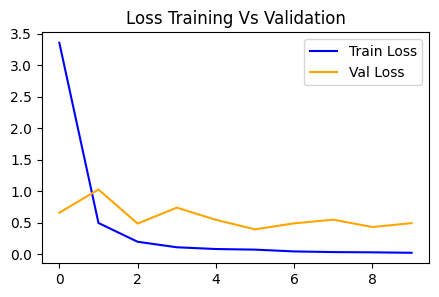

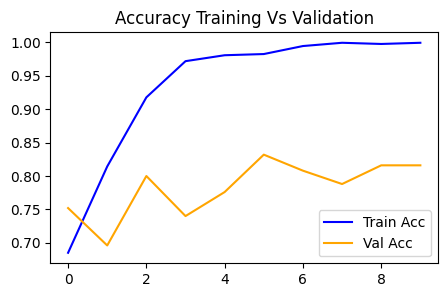

In [11]:
history = model.fit(train_data,epochs=10,validation_data=test_data)

show_result(history)

In [12]:
import pandas as pd

pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,3.359350,0.685029,0.655852,0.752
1,0.492561,0.814305,1.024719,0.696
2,0.193816,0.917814,0.483312,0.800
3,0.106296,0.972012,0.736531,0.740
4,0.078302,0.980897,0.542894,0.776
5,0.068743,0.982674,0.391574,0.832
6,0.040261,0.994669,0.487091,0.808
7,0.029770,0.999556,0.545188,0.788
8,0.025774,0.997779,0.428212,0.816
9,0.018721,0.999556,0.490748,0.816


In [13]:
model.save('KA_38_ConvNeXtXLarge.h5')